# Bike Sharing Assignment

### Problem statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Analysis
Data is analysed through four stages:
1. Data Reading and Understanding data
     -  Data Clearning
     -  Dropping Columns
     -  Change few numerical variables to catergorical variable type     
2. Data Visualization
3. Data Preparation
   - Create Dummy variables
   - Splitting data into train and test data
   - Rescaling the Features  
4. Model building and evaluation
   - RFE - Recursive feature elimination
   - Model 1
   - Model 2
   - Model 3
   - Model 4
   - Residual Analysis
   - Model Summary

### Step 1: Data Reading and Understanding data

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting maximum number of rows and column to get full details of row and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#Read the csv data file
data = pd.read_csv('day.csv', low_memory=False)
#viewing the first 5 data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the columns of data
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
#Get the number of rows and columns
data.shape

(730, 16)

In [6]:
#Check the info for analysing null and Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Describe the data to get the overall statistical informations
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [8]:
#Check for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Take the percentage of null values in each column
null_data_perc= round(((data.isnull().sum())/len(data))*100,2)
print(null_data_perc)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [10]:
# Check if there is any duplicates
data.drop_duplicates(subset=None, inplace=True)

In [11]:
#Check the shape of data set
data.shape

(730, 16)

#### Inference:
There are no null values and duplicate data in the given dataset

### Dropping Columns

In [12]:
#Get the count of working day
data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [13]:
#Get the count of holiday
data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

Variable 'instant' contains just the index information.

Variable 'dteday' is also not required as the year and month details as already given in other columns.

Variable 'cnt' indicates the total number of bike rentals, including both casual and registered. so casual and registered can be removed.

Variable 'holiday' can be removed as workday 0 indicates holiday

In [14]:
#Drop the columns
data.drop(['instant','dteday','holiday','casual','registered'],axis = 1,inplace = True)

In [15]:
# Get the shape of data
data.shape

(730, 11)

### Change few numerical variables to catergorical variable type

In [16]:
#mapping season variable
data.season = data.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [17]:
#mapping weathersit variable
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'})

In [18]:
#mapping month variable
data.mnth = data.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [19]:
#mapping weekday variable
data.weekday = data.weekday.map({0: 'mon',1: 'tue',2: 'wed',3: 'thu',4: 'fri',5: 'sat',6: 'sun'})

In [20]:
#mapping working variable
data.workingday = data.workingday.map({0:"holiday",1:"workingday"})

In [21]:
# view the data
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,sun,holiday,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,mon,holiday,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,tue,workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,wed,workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,thu,workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# check info to view the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    object 
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 68.4+ KB


#### Inference:
season, mnth, weekday, workingday, weathersit are the caterogical variable we are having

### Step 2: Data Visualization

<Figure size 1400x900 with 0 Axes>

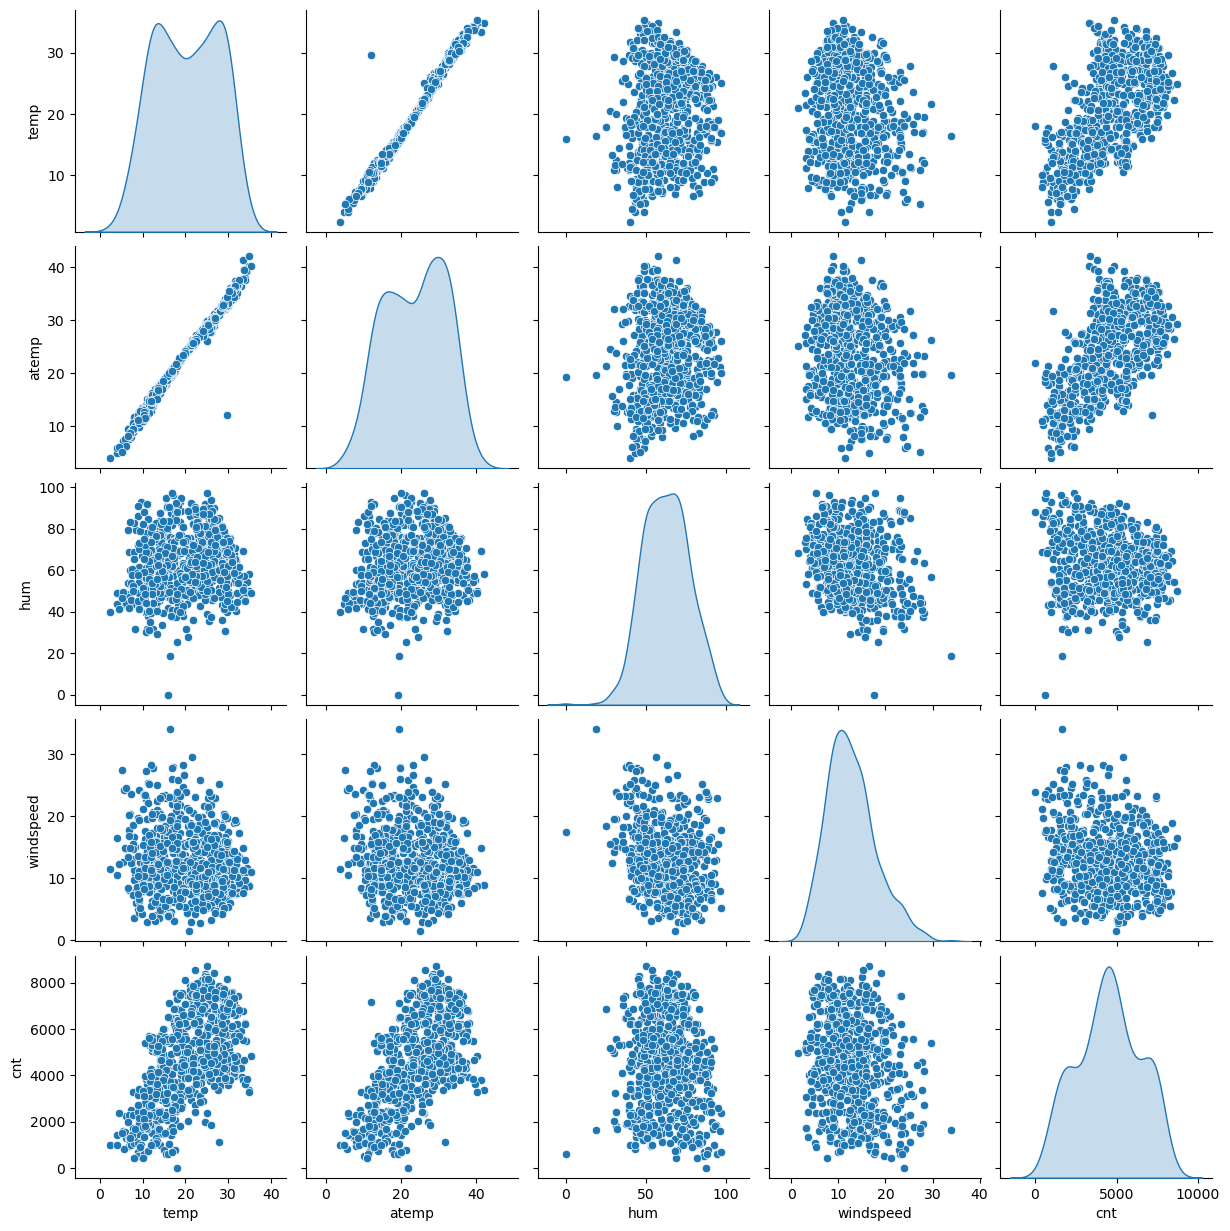

In [23]:
# visualizing numeric variable
plt.figure(figsize = (14,9))
sns.pairplot(data,vars=['temp', 'atemp', 'hum','windspeed','cnt'],diag_kind='kde')
plt.show()

#### Inference:

We can see that temp & atemp have high corelation with cnt variable

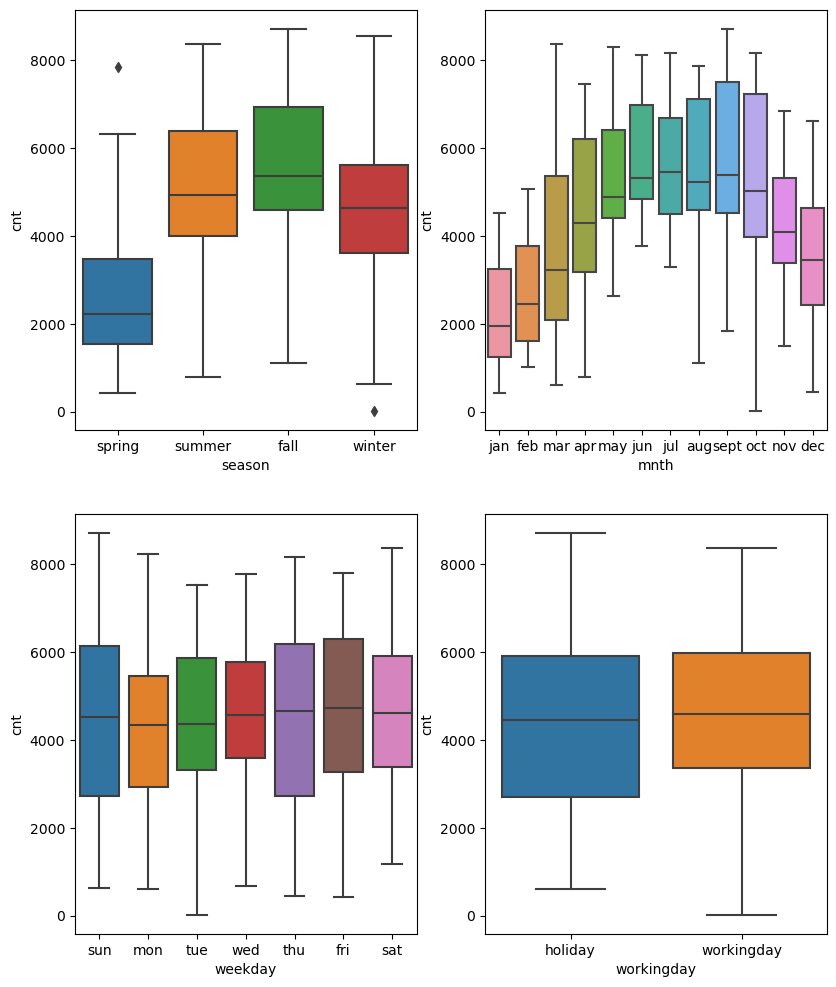

In [24]:
# visualizing caterogical variables

#Create boxplots for categorical variables
#x axis: predictor variables 
#y axis: target variables
plt.figure(figsize=(15, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =data)

plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)

plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()


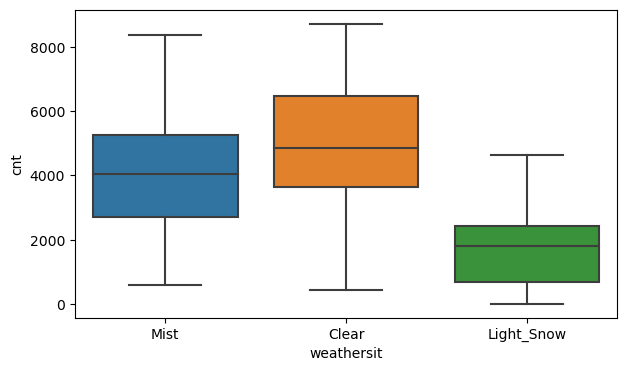

In [25]:
#Create boxplots for categorical variables
#x axis: predictor variables 
#y axis: target variables
plt.figure(figsize=(7, 4))
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

#### Inferences
Season:  From the boxplot we can clearly understand that in the spring season the number of bike rentals is less when compared to other seasons. Fall has the highest demand for bike rentals.

Month:  Every month starting from January to June the count of rental increases.September has the highest count of bike rentals and then the count drops in the month of October to December.

For Weekday and Workingday, the variation is not very significant.

Weathersit: Count of bike rental is high for clear weather.


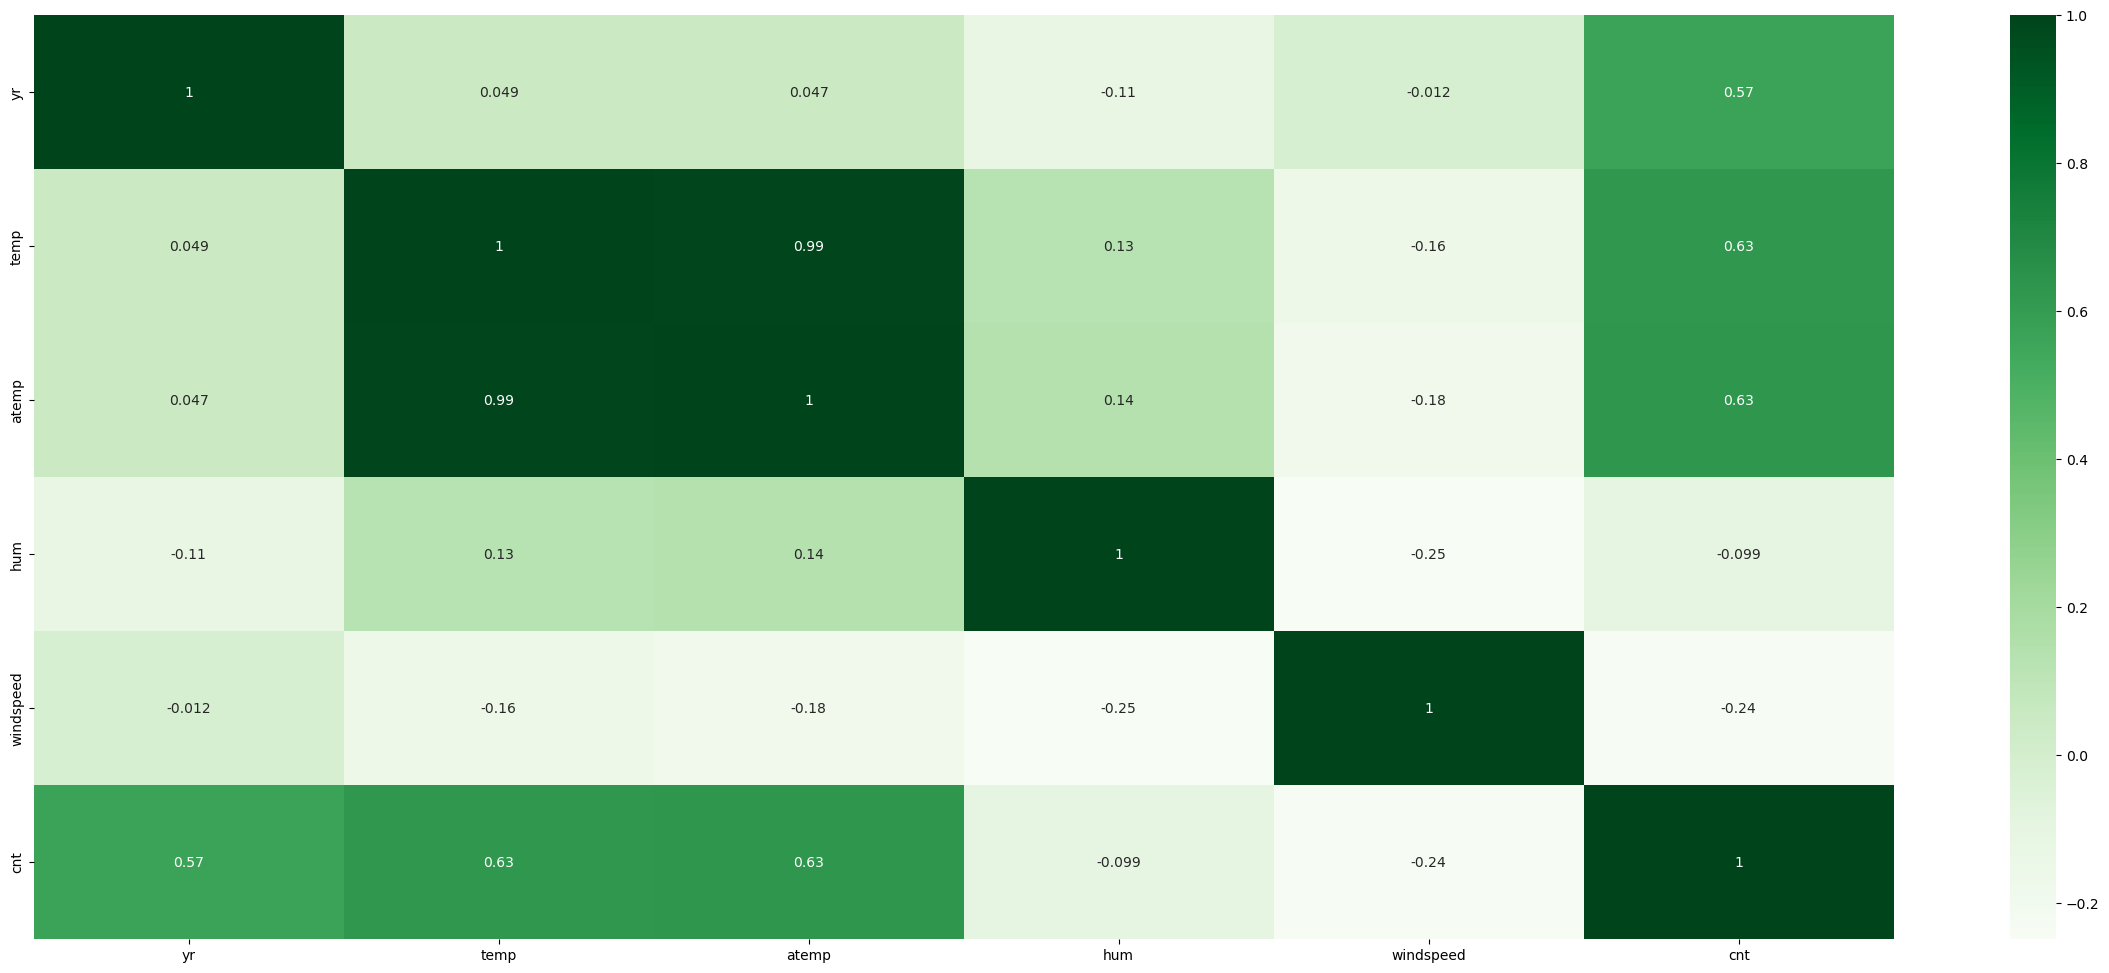

In [26]:
#Heat map for the visualizting the correlation between the variables.
plt.figure(figsize=(30,12))
sns.heatmap(data.corr(),annot=True,cmap="Greens")
plt.show()

#### Inference:

From the heat map we can see that temp and atemp are highly corelated so we can remove atemp from the data set as it will affect the performance of the model

In [27]:
# dropping atemp variable
data.drop('atemp',axis=1,inplace=True)

In [28]:
# check the shape of data
data.shape

(730, 10)

In [29]:
# check the info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    object 
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 62.7+ KB


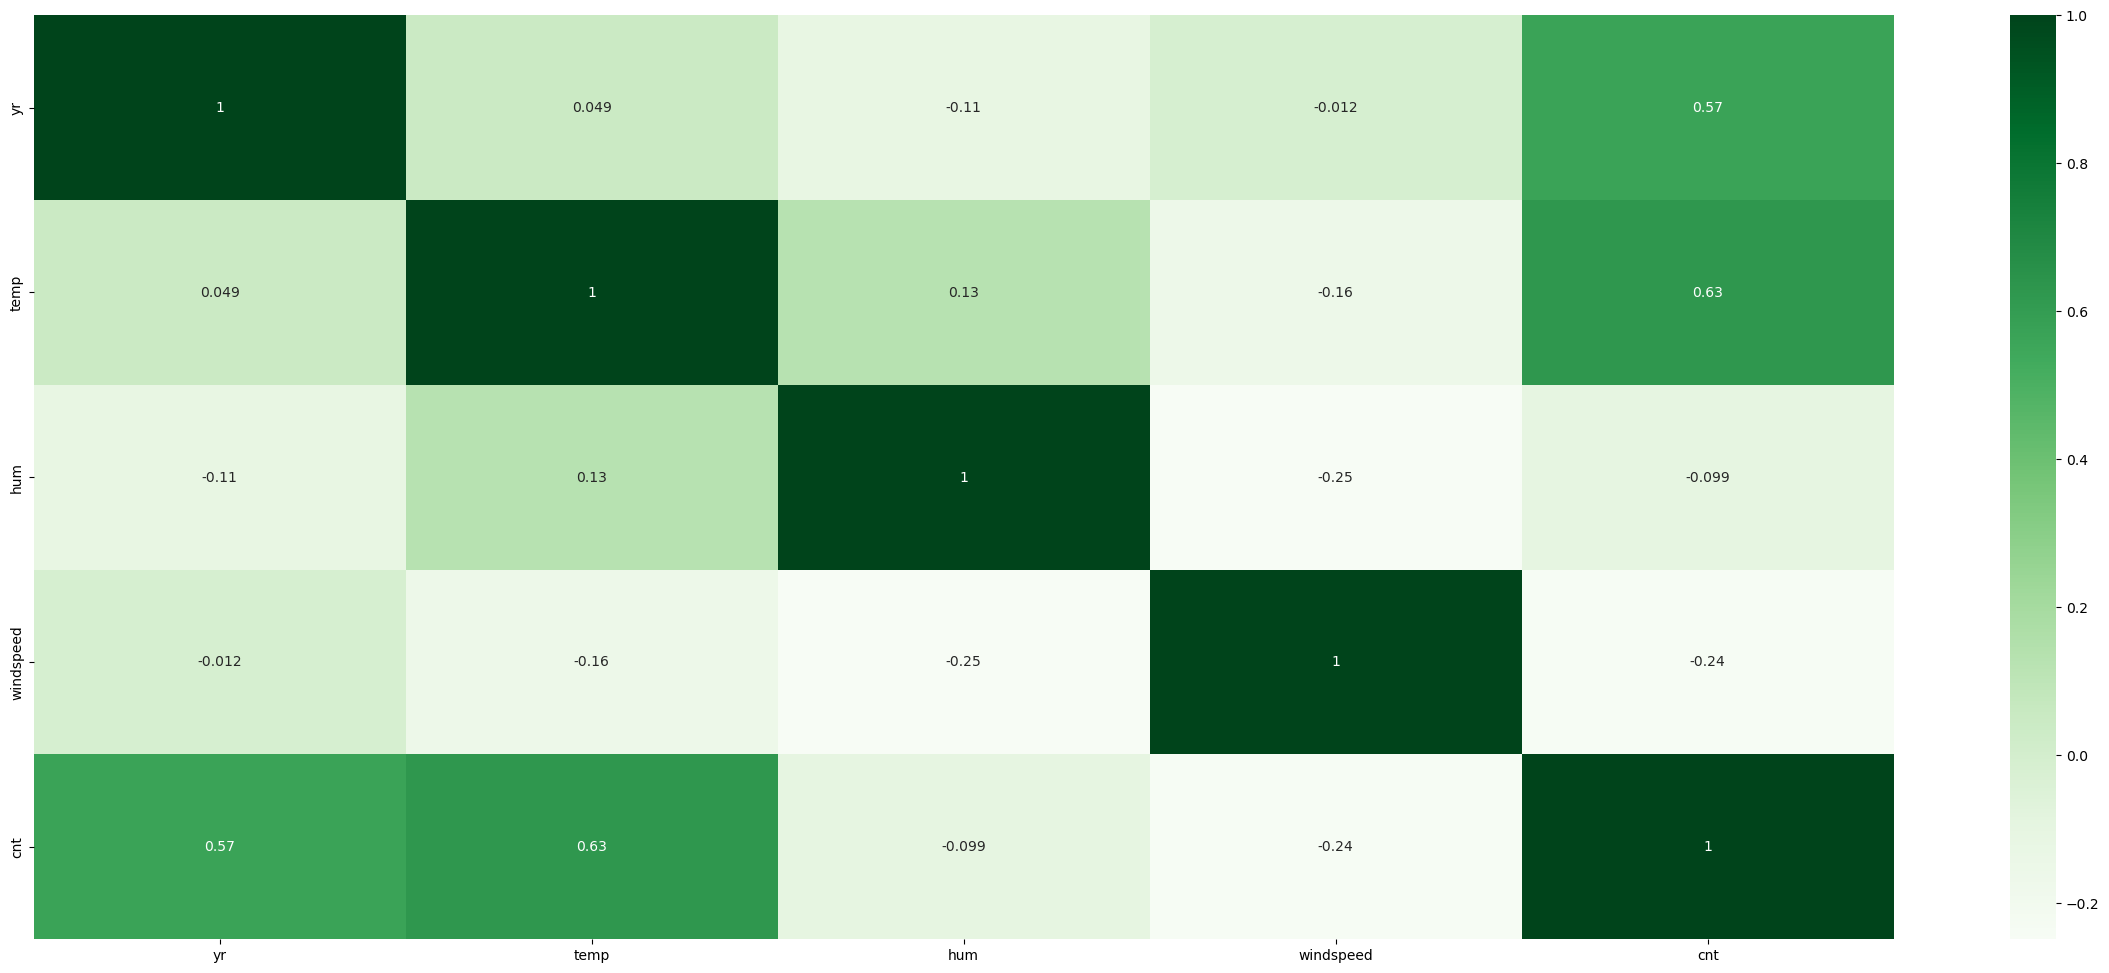

In [30]:
#Heat map for visualizing the coorelation
plt.figure(figsize=(30,12))
sns.heatmap(data.corr(),annot=True,cmap="Greens")
plt.show()

#### Inference:

Now there are no variables which are highly corelated with each other

### Step 3: Data Preparation

### Create Dummy variables

In [31]:
#creating dummy variables for categorical variables
data = pd.get_dummies(data=data,columns=['season','mnth','weekday','weathersit','workingday'],drop_first=True)

In [32]:
# view the columns
data.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_Light_Snow',
       'weathersit_Mist', 'workingday_workingday'],
      dtype='object')

In [33]:
# view the data
data.head()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist,workingday_workingday
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [34]:
# get the shape of data
data.shape

(730, 28)

### Splitting data into train and test data

In [35]:
#spliting data into train and test
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

print("Shape of train dataset:",df_train.shape)
print("Shape of test dataset:",df_test.shape)

Shape of train dataset: (510, 28)
Shape of test dataset: (219, 28)


### Rescaling the Features

In [36]:
# describe the data set to get the statistical informations
df_train.describe()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist,workingday_workingday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137,0.676471
std,0.500429,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223,0.468282
min,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Inference:
There are outliers for 'temp','hum','windspeed' and 'cnt' variables, so we have to scale the model to handle the outliers

In [37]:
# Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.describe()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist,workingday_workingday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137,0.676471
std,0.500429,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Inference:
MinMaxscaler handled the outlier and now the max values for 'temp','hum','windspeed' and 'cnt' variables are scaled to 1

### Step 4: Model building and evaluation

In [39]:
#Dividing train data set into X and Y for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
# View the X_train data
X_train.head()

,yr,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist,workingday_workingday
653,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
576,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
426,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [41]:
# View the y_train data
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### RFE - Recursive feature elimination

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)  #running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', False, 4),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 8),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 6),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 17),
 ('mnth_mar', False, 18),
 ('mnth_may', False, 10),
 ('mnth_nov', False, 7),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', False, 15),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 13),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('workingday_workingday', False, 2)]

In [44]:
#Columns selected by RFE
cols = X_train.columns[rfe.support_]
print(cols)

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'mnth_jul',
       'mnth_sept', 'weekday_sun', 'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')


In [45]:
# Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'workingday_workingday'],
      dtype='object')

In [46]:
#function to build the model
def model(dataframe):
    X_train_rfe = sm.add_constant(dataframe) # Adding a constant variable 
    lm = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model
    print(lm.summary()) #Print the summary of our linear model
    return lm, X_train_rfe

In [47]:
#function to calculate VIF
def vif(cols):
    X_train_new = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Model 1

In [48]:
X_train_rfe = X_train[cols]
# Calling model function
lm1, X_train_model_1 = model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.33e-184
Time:                        10:23:36   Log-Likelihood:                 488.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     499   BIC:                            -908.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

#### Inference:

weekday_sun is having p value greater than 0.05. So we can drop weekday_sun variable


In [49]:
#dropping weekday_sun variable
X_train_model_1 = X_train_model_1.drop(['weekday_sun'], axis=1)

### Model 2

In [50]:
# Calling model function
lm2, X_train_model_2 = model(X_train_model_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.39e-184
Time:                        10:23:36   Log-Likelihood:                 486.89
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

#### Inference:

There are no variables with p value greater than 0.05

VIF has to be calculated after droping the constant

### Model 3


In [51]:
#dropping constant
X_train_model_3 = X_train_model_2.drop(['const'], axis=1)

In [52]:
#Calling vif function
vif(X_train_model_3.columns)

                Features    VIF
2                    hum  14.88
1                   temp  11.88
3              windspeed   3.94
8        weathersit_Mist   2.10
0                     yr   2.03
4          season_spring   1.84
5               mnth_jul   1.40
6              mnth_sept   1.20
7  weathersit_Light_Snow   1.20


#### Inference:
'hum' is having high VIF which is above 5. So we need to drop 'hum'

### Model 4

In [53]:
#dropping hum
X_train_model_4 = X_train_model_3.drop(['hum'], axis=1)

In [54]:
# calling vif function
vif(X_train_model_4.columns)

                Features   VIF
1                   temp  4.60
2              windspeed  3.81
0                     yr  2.03
3          season_spring  1.52
7        weathersit_Mist  1.48
4               mnth_jul  1.33
5              mnth_sept  1.20
6  weathersit_Light_Snow  1.06


In [55]:
# calling model function
lm4, X_train_model_4 = model(X_train_model_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.84e-183
Time:                        10:23:36   Log-Likelihood:                 481.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

#### Inference:

Model 4 is the final model where all th p values and VIF values are handled.

###### The R-squared obtained for train data is 82.4%.

temp is having higher coefficient which mean a unit increase in temp increase cnt by '0.3937' units

### Residual Analysis

In [56]:
# calculate y predicted value for train data
y_train_pred = lm4.predict(X_train_model_4)
y_train_pred

653    0.694290
576    0.747317
426    0.448247
728    0.388781
482    0.586057
111    0.301501
580    0.829072
500    0.796447
479    0.719170
472    0.616140
455    0.596315
636    0.768852
224    0.475446
458    0.730676
244    0.531094
627    0.806770
595    0.727471
140    0.544716
454    0.569814
162    0.574802
231    0.596628
688    0.600319
659    0.736715
696    0.600695
320    0.275816
534    0.813433
136    0.392929
568    0.769983
474    0.733513
206    0.528939
427    0.428427
288    0.447356
447    0.627202
259    0.440380
174    0.571175
267    0.555952
327    0.416994
402    0.503689
590    0.825310
609    0.817705
704    0.592485
376    0.426192
365    0.496775
15     0.194555
656    0.676003
639    0.505025
470    0.756731
561    0.772252
680    0.705320
591    0.815297
240    0.548637
597    0.818884
718    0.562347
115    0.491548
565    0.629353
154    0.559844
471    0.733010
241    0.561276
552    0.820703
651    0.688858
384    0.338102
315    0.394146
484    0

In [57]:
# calculating residual value
res = y_train - y_train_pred

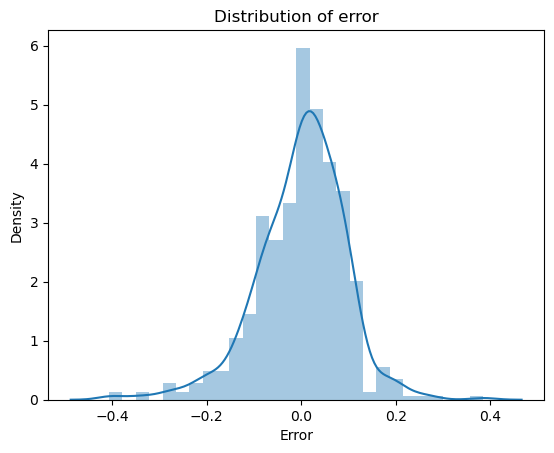

In [58]:
#plot to find the distribution of errors
plt.title('Distribution of error')
plt.xlabel('Error')
sns.distplot(res)
plt.show()

#### Inference:
Error terms are normally distributed and are having mean 0

In [59]:
# assigning numerical variables to num vars
num_vars = ['temp','hum','windspeed','cnt']

In [60]:
# Scaling test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist,workingday_workingday
184,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
535,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
299,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
221,0,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
152,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [61]:
#Dividing test data set into X and Y for the model building
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
#Dropping the const from model 4
X_train_model = X_train_model_4.drop(['const'], axis=1)

In [63]:
#Create RFE model for test data set
X_test_rfe = X_test[X_train_model.columns]
X_test_lm = sm.add_constant(X_test_rfe)
X_test_lm.head()

,const,yr,temp,windspeed,season_spring,mnth_jul,mnth_sept,weathersit_Light_Snow,weathersit_Mist
184,1.0,0,0.831783,0.084219,0,1,0,0,1
535,1.0,1,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0


In [64]:
# y predicted for test data
y_test_pred = lm4.predict(X_test_lm)

In [65]:
# calculating r2 score for train data
r2_train = round(r2_score(y_true = y_train, y_pred = y_train_pred),4)

In [66]:
# calculating r2 score for test data
r2_test = round(r2_score(y_true = y_test, y_pred = y_test_pred),4)

In [67]:
print('Train R-squared:', r2_train )

Train R-squared: 0.8239


In [68]:
print('Test R-squared:', r2_test )

Test R-squared: 0.8018


#### Inference:
As we can see that the r2 score for test data set is 80.18% and for the train data set is 82.39 which mean they are almost close value.

## Model Summary

In [69]:
#Print the final model summary
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.84e-183
Time:                        10:23:36   Log-Likelihood:                 481.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

From the above summary we infer that 'temp', 'yr', 'mnth_sept' are having positive coefficients which means that when these variable increase the cnt value also increase.

Variables 'windspeed', 'season_spring', 'mnth_jul', 'weathersit_Light_Snow', 'weathersit_Mist' are having negative coefficients so when these value increase the cnt value tends to drop.


From the above analysis we can drive the equation for the target variable cnt

$ cnt = 0.3937  \times temp + 0.2356  \times yr + 0.0531 \times  mnth\_sept - 0.2748 \times  weathersit\_Light\_Snow - 0.1525 \times windspeed - 0.1460 \times season\_spring - 0.0804 \times weathersit\_Mist - 0.0727 \times mnth\_jul + 0.3038 $


We have a couple of options: 

Company should focus on expanding business on spring season, during the month of july and during  weather situations light snow and mist


## Top 4 predictors

Below are the top 4 predictors
1. Temperature
2. Year
3. weathersit = Light_Snow
4. windspeed